## **TAXI ROUTE OPTIMIZATION WITH REINFORCEMENT LEARNING**

In [4]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt


In [3]:
env=gym.make('Taxi',render_mode='rgb_array')


C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\gymnasium\envs\registration.py:527: UserWarning: WARN: Using the latest versioned environment `Taxi-v3` instead of the unversioned environment `Taxi`.
  logger.warn(


In [8]:
def render():
    state_image=env.render()
    plt.imshow(state_image)
    plt.show()

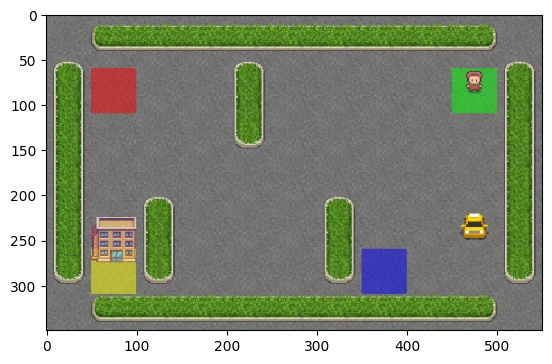

In [9]:
state,info=env.reset(seed=42)
render()

In [10]:
print(info)

{'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)}


In [11]:
print(env.action_space.n)
print(env.observation_space.n)

6
500
